In [68]:
import sys
import os
import numpy as np
from pathlib import Path


# Add the project root directory to Python path
project_root = str(Path(os.getcwd()).parent)
if project_root not in sys.path:
    sys.path.append(project_root)
import pandas as pd
import matplotlib.pyplot as plt

from utils.plots import EDAPlots

# Seasonal Nature of Natural Gas Storage Numbers

In [69]:

columns_to_load = ['Week ending', 'Total Lower 48']
df = pd.read_excel("../data/storage.xls", header=6, usecols=columns_to_load).rename(columns={'Total Lower 48' : 'Storage_Bcf'})
df.dtypes

Week ending    datetime64[ns]
Storage_Bcf             int64
dtype: object

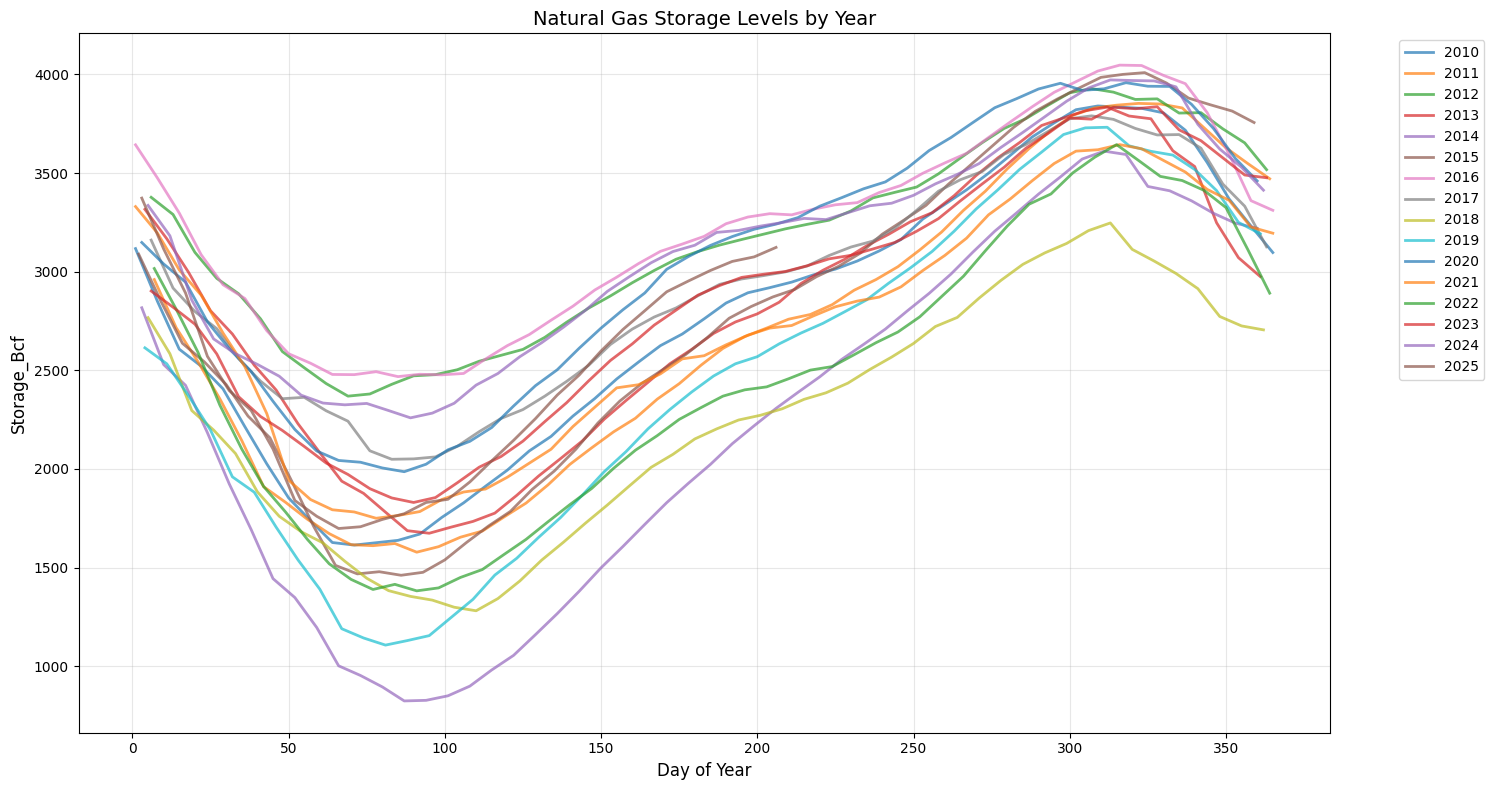

In [70]:

df['Year'] = df['Week ending'].dt.year
df['DayOfYear'] = df['Week ending'].dt.dayofyear
EDAPlots.generate_year_plot(df, 'Storage_Bcf', 'Natural Gas Storage Levels by Year')

### Feature Engineering

We will take a look at a couple derived features within this single time series, noteably:
- Raw Storage Number
- Week-Over-Week Injections/Withdrawls  
- Deviation (current storage - 5Y Avg)
- Ratio (current storage / 5Y Avg for a given week)

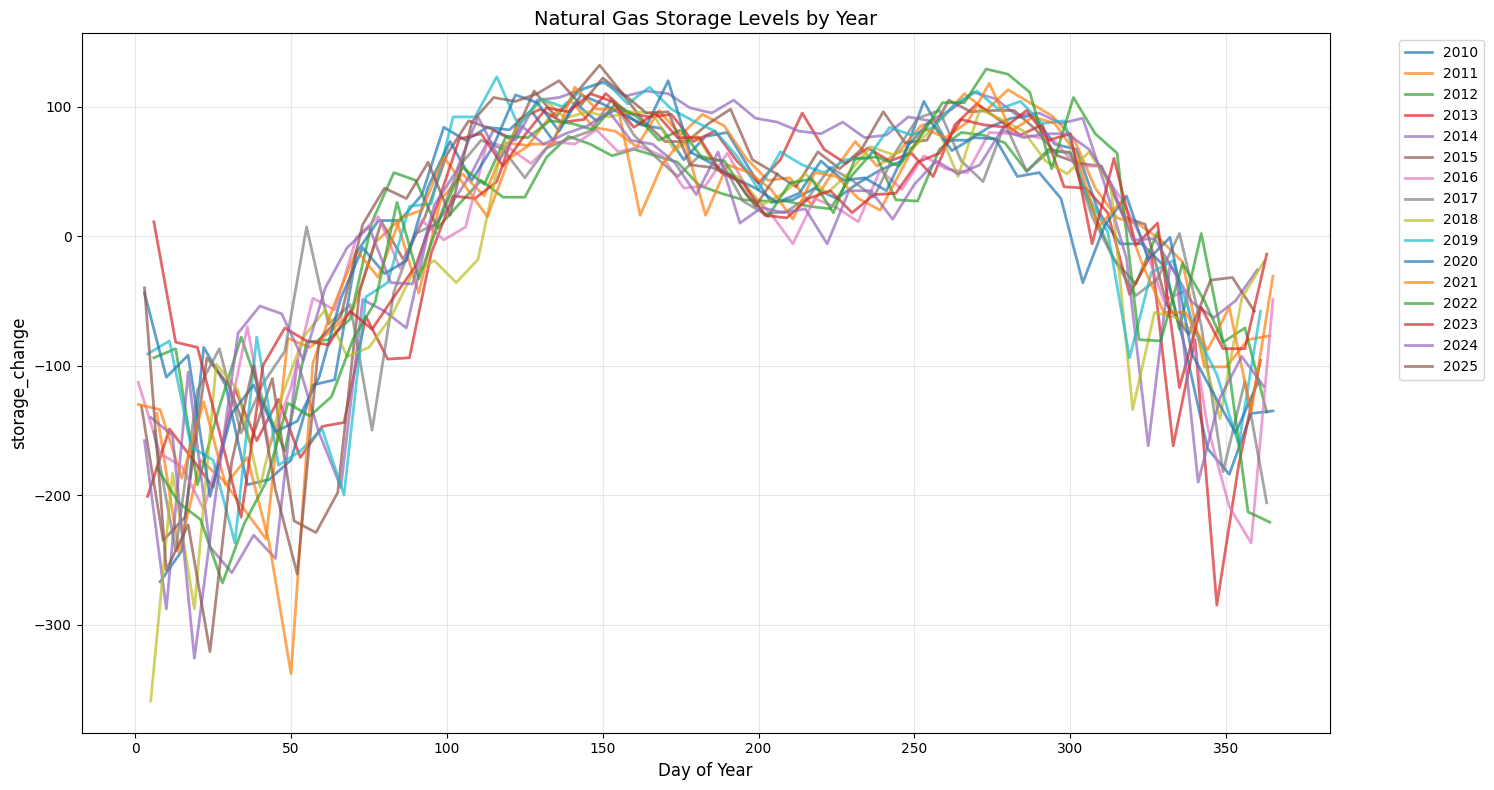

In [71]:
df['storage_change'] = df['Storage_Bcf'] - df['Storage_Bcf'].shift(1)
EDAPlots.generate_year_plot(df, 'storage_change', 'Natural Gas Storage Levels by Year')

In [72]:

df['%_change'] = df['storage_change'] / df['Storage_Bcf'].shift(1) * 100
df

,Week ending,Storage_Bcf,Year,DayOfYear,storage_change,%_change
0,2010-01-01,3117,2010,1,NaN,NaN
1,2010-01-08,2850,2010,8,-267.0,-8.565929
2,2010-01-15,2607,2010,15,-243.0,-8.526316
3,2010-01-22,2521,2010,22,-86.0,-3.298811
4,2010-01-29,2406,2010,29,-115.0,-4.561682
...,...,...,...,...,...,...
808,2025-06-27,2953,2025,178,55.0,1.897861
809,2025-07-04,3006,2025,185,53.0,1.794785
810,2025-07-11,3052,2025,192,46.0,1.530273
811,2025-07-18,3075,2025,199,23.0,0.753604


In [76]:
# Add week number column
df['5_yr_weekly_storage_avg'] = (
    df['Storage_Bcf'] + 
    df['Storage_Bcf'].shift(52) + 
    df['Storage_Bcf'].shift(52 * 2) +
    df['Storage_Bcf'].shift(52 * 3) +
    df['Storage_Bcf'].shift(52 * 4)
) / 5

df['storage_deviation'] = df['Storage_Bcf'] - df['5_yr_weekly_storage_avg']
df

,Week ending,Storage_Bcf,Year,DayOfYear,storage_change,%_change,5_yr_weekly_storage_avg,storage_deviation
0,2010-01-01,3117,2010,1,NaN,NaN,NaN,NaN
1,2010-01-08,2850,2010,8,-267.0,-8.565929,NaN,NaN
2,2010-01-15,2607,2010,15,-243.0,-8.526316,NaN,NaN
3,2010-01-22,2521,2010,22,-86.0,-3.298811,NaN,NaN
4,2010-01-29,2406,2010,29,-115.0,-4.561682,NaN,NaN
...,...,...,...,...,...,...,...,...
808,2025-06-27,2953,2025,178,55.0,1.897861,2770.6,182.4
809,2025-07-04,3006,2025,185,53.0,1.794785,2826.6,179.4
810,2025-07-11,3052,2025,192,46.0,1.530273,2862.2,189.8
811,2025-07-18,3075,2025,199,23.0,0.753604,2884.6,190.4


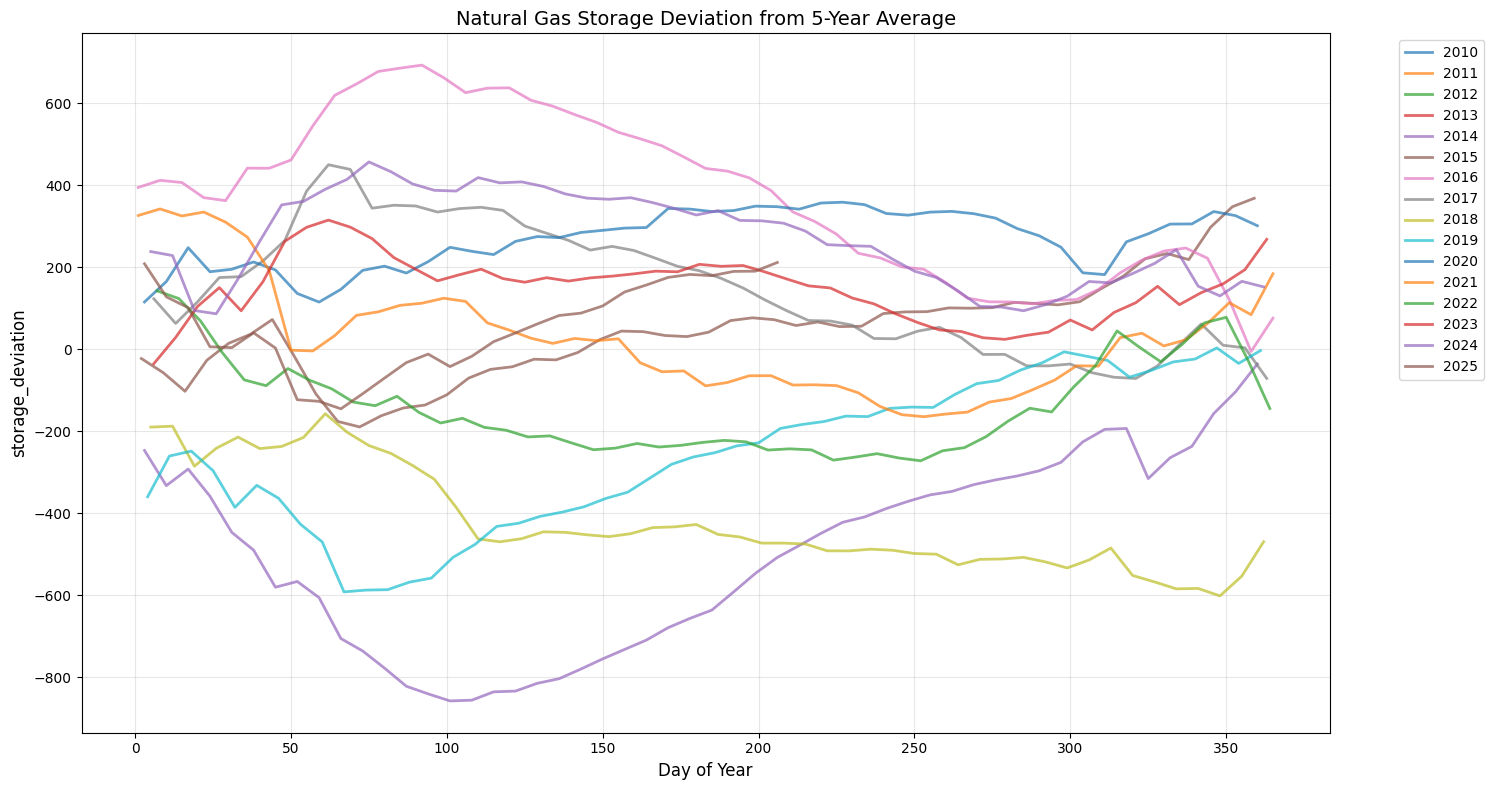

In [77]:
EDAPlots.generate_year_plot(df, 'storage_deviation', 'Natural Gas Storage Deviation from 5-Year Average')

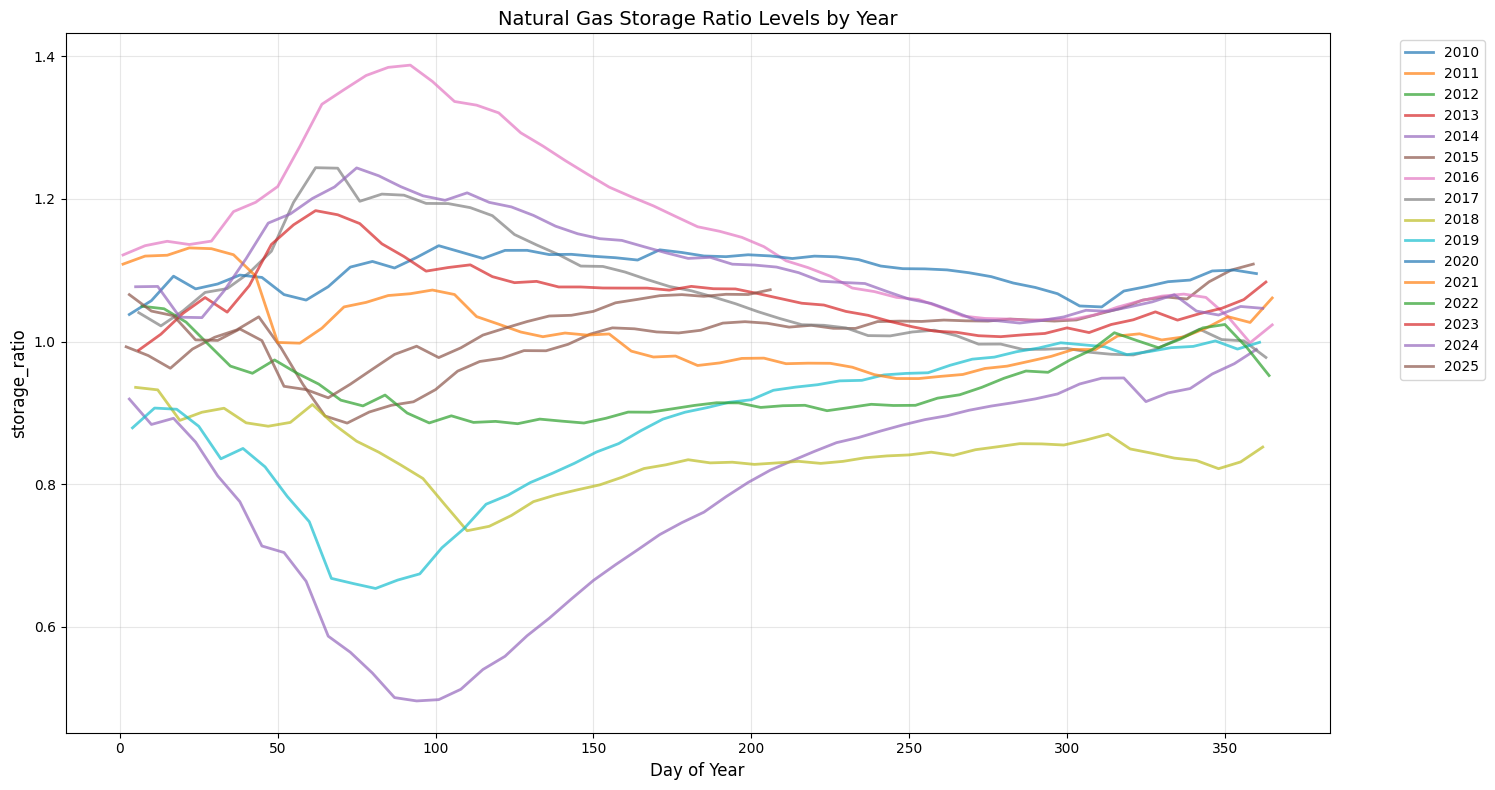

In [79]:
df['storage_ratio'] = df['Storage_Bcf'] / df['5_yr_weekly_storage_avg']
EDAPlots.generate_year_plot(df, 'storage_ratio', 'Natural Gas Storage Ratio Levels by Year')

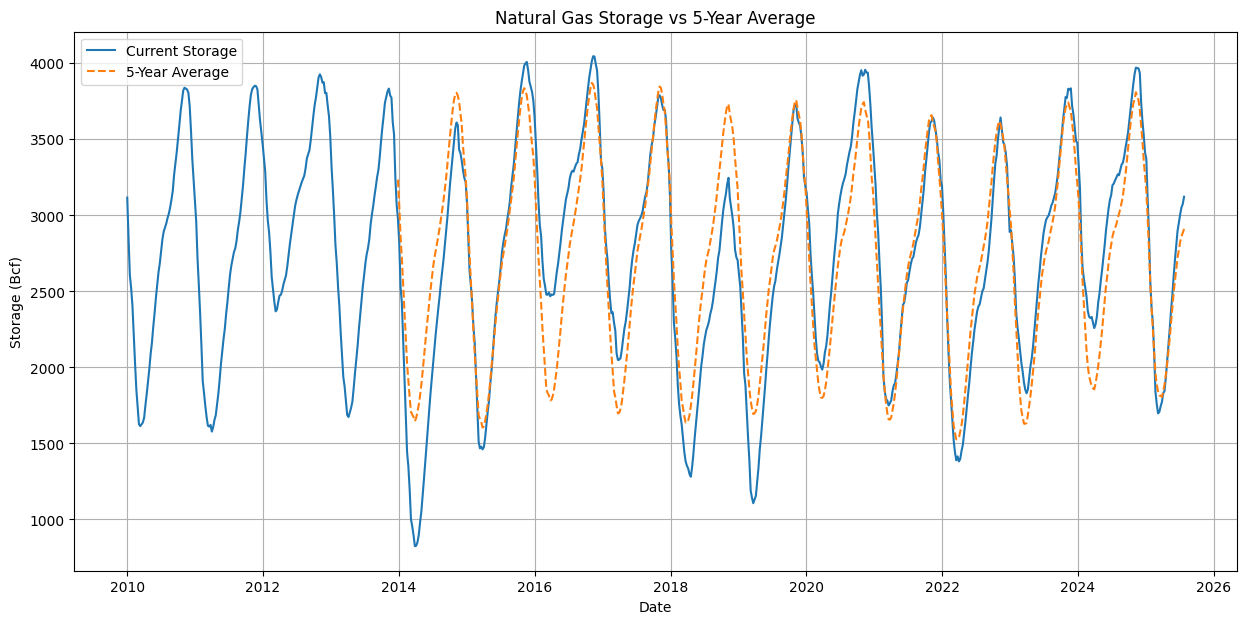

In [74]:
# Plot current storage vs 5-year average
plt.figure(figsize=(15, 7))
plt.plot(df['Week ending'], df['Storage_Bcf'], label='Current Storage')
plt.plot(df['Week ending'], df['5_yr_weekly_storage_avg'], label='5-Year Average', linestyle='--')
plt.title('Natural Gas Storage vs 5-Year Average')
plt.xlabel('Date')
plt.ylabel('Storage (Bcf)')
plt.legend()
plt.grid(True)
plt.show()


# Lagged/Rolling Average Features

In [83]:
df['storage_change_4_week_roll'] = df['storage_change'].rolling(window=4).mean()
df['storage_deviation_4_week_roll'] = df['storage_deviation'].rolling(window=4).mean()
df

,Week ending,Storage_Bcf,Year,DayOfYear,storage_change,%_change,5_yr_weekly_storage_avg,storage_deviation,storage_ratio,storage_change_4_week_roll,storage_deviation_4_week_roll
0,2010-01-01,3117,2010,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-01-08,2850,2010,8,-267.0,-8.565929,NaN,NaN,NaN,NaN,NaN
2,2010-01-15,2607,2010,15,-243.0,-8.526316,NaN,NaN,NaN,NaN,NaN
3,2010-01-22,2521,2010,22,-86.0,-3.298811,NaN,NaN,NaN,NaN,NaN
4,2010-01-29,2406,2010,29,-115.0,-4.561682,NaN,NaN,NaN,-177.75,NaN
...,...,...,...,...,...,...,...,...,...,...,...
808,2025-06-27,2953,2025,178,55.0,1.897861,2770.6,182.4,1.065834,88.75,163.45
809,2025-07-04,3006,2025,185,53.0,1.794785,2826.6,179.4,1.063468,74.75,173.40
810,2025-07-11,3052,2025,192,46.0,1.530273,2862.2,189.8,1.066313,62.50,181.70
811,2025-07-18,3075,2025,199,23.0,0.753604,2884.6,190.4,1.066006,44.25,185.50


# Output Dataframe

In [93]:
output_df = df.dropna().reset_index(drop=True)
output_df['Week'] = output_df['Week ending'].dt.isocalendar().week
output_df = output_df.drop(columns=['Week ending', 'DayOfYear'])
output_df.to_csv("../data/output/storage_features.csv", index=False)

In [92]:
output_df

,Storage_Bcf,Year,storage_change,%_change,5_yr_weekly_storage_avg,storage_deviation,storage_ratio,storage_change_4_week_roll,storage_deviation_4_week_roll,Week
0,2424,2014,-105.0,-4.151839,2716.4,-292.4,0.892358,-161.75,-283.15,3
1,2184,2014,-240.0,-9.900990,2542.6,-358.6,0.858963,-197.75,-307.70,4
2,1924,2014,-260.0,-11.904762,2370.8,-446.8,0.811540,-223.25,-357.65,5
3,1693,2014,-231.0,-12.006237,2183.2,-490.2,0.775467,-209.00,-397.00,6
4,1444,2014,-249.0,-14.707620,2024.6,-580.6,0.713227,-245.00,-469.05,7
...,...,...,...,...,...,...,...,...,...,...
597,2953,2025,55.0,1.897861,2770.6,182.4,1.065834,88.75,163.45,26
598,3006,2025,53.0,1.794785,2826.6,179.4,1.063468,74.75,173.40,27
599,3052,2025,46.0,1.530273,2862.2,189.8,1.066313,62.50,181.70,28
600,3075,2025,23.0,0.753604,2884.6,190.4,1.066006,44.25,185.50,29
